In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("Loading data")
print("x_train.shape: ", x_train.shape)

4422102/4422102 [==============================] - 1s 0us/step
Loading data
x_train.shape:  (60000, 28, 28)


In [4]:
#CNN requires 3 dimensions
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape: ", x_train.shape)


x_train.shape:  (60000, 28, 28, 1)


In [5]:
# number of classes
K = len(set(y_train))
print("num classes: ", + K)

num classes:  10


In [6]:
%%time
# Input layer
print("Shape: ", x_train[0].shape)
i = Input(shape=x_train[0].shape)

# model based on vgg net that has successive conv steps before pooling.
# https://viso.ai/deep-learning/vgg-very-deep-convolutional-networks/
x = Conv2D(32, (3, 3), padding='Same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3, 3), padding='Same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


x = Conv2D(64, (3, 3), padding='Same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3, 3), padding='Same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)

x = Conv2D(128, (3, 3), padding='Same', activation='relu')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3, 3), padding='Same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x)


# flatten (outputsize: 14*14*128 = 25,088)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)
model.summary()

Shape:  (28, 28, 1)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 128)       1280      
                                                                 
 batch_normalization_4 (Bat  (None, 28, 28, 128)       512       
 chNormalization)                                                
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 batch_normalization_5 (Bat  (None, 28, 28, 128)       512       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 1

In [7]:
# compile and fit
%%time
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20)

Epoch 1/20
1875/1875 [==============================] - 19s 4ms/step - loss: 0.5692 - accuracy: 0.8107 - val_loss: 0.3614 - val_accuracy: 0.8756
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3698 - accuracy: 0.8684 - val_loss: 0.3104 - val_accuracy: 0.8851
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3093 - accuracy: 0.8865 - val_loss: 0.2842 - val_accuracy: 0.8981
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2764 - accuracy: 0.9006 - val_loss: 0.2750 - val_accuracy: 0.9041
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2464 - accuracy: 0.9098 - val_loss: 0.2914 - val_accuracy: 0.9040
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2251 - accuracy: 0.9176 - val_loss: 0.2760 - val_accuracy: 0.9144
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2055 - accuracy: 0.9245 - val_loss: 0.2389 - val_accuracy

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


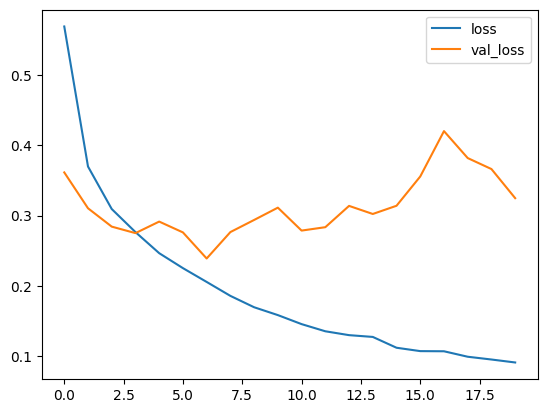

CPU times: user 183 ms, sys: 225 ms, total: 408 ms
Wall time: 181 ms


In [8]:
%%time
print(r.history.keys())

# plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

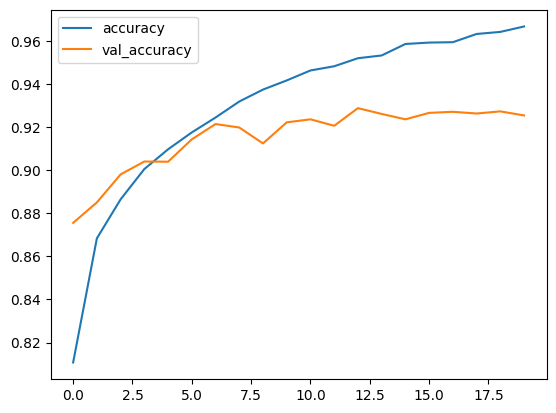

CPU times: user 197 ms, sys: 224 ms, total: 421 ms
Wall time: 176 ms


In [9]:
# plot accuracy per iteration
%%time
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()